#                                      Analysis of the Titanic Dataset

In the analysis of the Titanic dataset, the major question that arises is How many factors affected a person's survival rate? With the given data, this question was broken down into further branches.

*A) Did individual characteristics played any role in the survival rate?*
      1. Age
      2. Gender
      3. Adult or child
      4. Passenger Class


*B) Which was the location a passenger embarked from? And is there a relation between the embarkment location and the class in which the passenger resided? Perhaps that may tell us something about that place's socio economic condition.*

*C) Did the survival rate depend on whether the person was travelling alone or with family?*
   If with family, these were the factors:
                        1. Sibling
                        2. Parents

## Importing the data and building the dataframes. Loading the libraries required. And looking at some data.

In [324]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Importing the csv file
data_titanic = pd.read_csv('titanic-data.csv')

#Dropping the 'Name' and the 'Ticket' column since we are not analyzing them
data_titanic = data_titanic.drop(["Ticket"], axis = 1)
data_titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


## For future calculations and analysis, we would divide the dataframe into two new dataframes. 

1. **Mendata** : Will consist of only the data where the gender is 'Male'

2. **Womendata** : Will consist of only the data where the gender is 'Female'

In [325]:
mendata = data_titanic[data_titanic.Sex == 'male']
womendata = data_titanic[data_titanic.Sex == 'female']

## Some basic statistics of the fields available 

Here we see that for the 'Cabin' column, most of the data is Null. Only 204 valid record are there.

In [326]:
data_titanic.info()
data_titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Gender distribution

We know from the internet and old newspapers and also the movie, that women were given more importance for rescual than men. So our hypothesis is that men will be less likely to survive than women. We will analyze that hypothesis with our data. But this is one of the major reasons, we divided our data into two new dataframes **'mendata'** and **'womendata'** so that we can use these dataframes for gender related comparisons. The below plot shows us the Gender Distribution among the whole population.

No of males: 577
No of females: 314


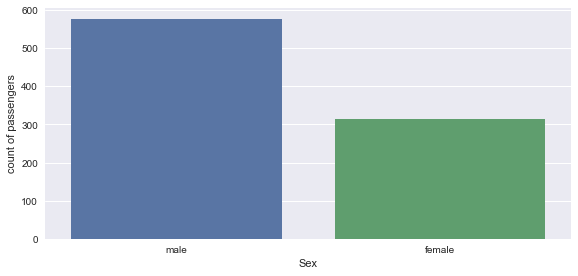

In [327]:
print("No of males: " + str(mendata.count()['Sex']))
print("No of females: " + str(womendata.count()['Sex']))


gender = sns.factorplot('Sex', data=data_titanic, kind='count',aspect = 2)
gender.set_ylabels("count of passengers")
plt.show()

This curve tells us that major gender was male (577) and number of females was 314.

## Age distribution

From the data we see, that there are a huge range of age among the passengers. Age will also be an important factor in survival rate as we know that older people were given more priority over younger people. So first let's plot an overall distribution of passengers by age.

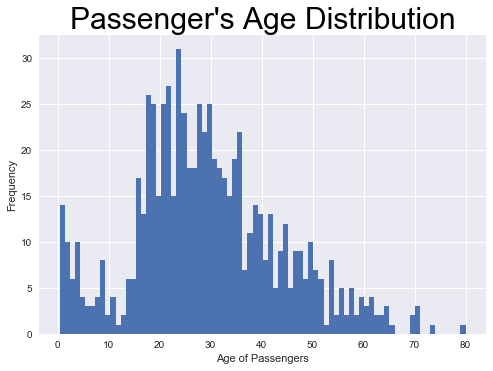

In [328]:
age_data = data_titanic['Age']
plt.hist(age_data.dropna(), bins = 80) #As the max age is 80
plt.xlabel("Age of Passengers")
plt.ylabel("Frequency")
plt.title("Passenger's Age Distribution", fontsize = 30, color = 'black')
plt.show()

From the above histogram, we see that the majority of the passengers were in the range of **20-35** with highest peak around **23-24**. Also the curve is positively skewed. This fact is supported by the mean age calculated from the describe function above, which is **29.69**.

## Distribution by Class

Let us now find out how the distribution was among the passengers based on the class he/she was staying in. There were three classes (First, Second and Third). Later we will analyze if one class was given more priority than the others.

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64


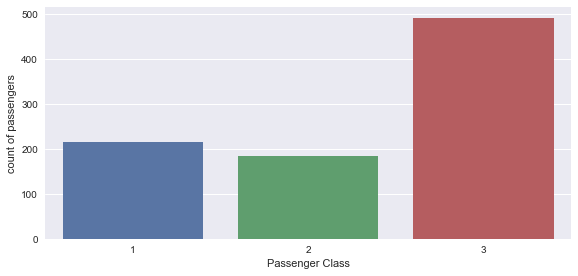

In [329]:
count_first = data_titanic.groupby('Pclass')['PassengerId'].count()
print(count_first)

class_data = sns.factorplot('Pclass', data=data_titanic, kind='count', aspect = 2)
class_data.despine(left=True)
class_data.set_ylabels("count of passengers")
class_data.set_xlabels("Passenger Class")
plt.show()

So we see that the majority of the people belonged to the **Third class(491 people)**, followed by the **First class(216 people)** and at last the **Second class(184 people)**.

## Distribution by the Embarkment place.

Before setting sail, the passengers embarked from 3 cities, namely : **Cherbourg (C)**, **Queenstown (Q)** and **Southampton (S)**. Let's look at the distribution of the places and the number of people disembarked from each of them.

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64


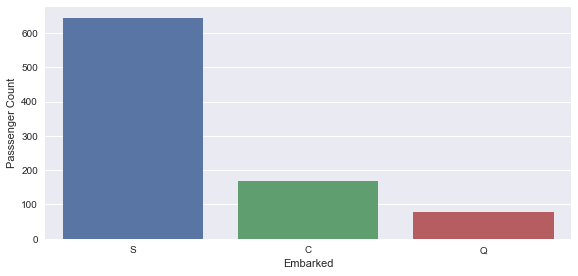

In [330]:
embarked_count = data_titanic.groupby('Embarked')['PassengerId'].count()
print(embarked_count)

embarked_data = sns.factorplot('Embarked', data = data_titanic, kind = 'count', aspect = 2)
plt.ylabel("Passsenger Count")
plt.show()

So we see, **Southampton** was the city from which majority of the people embarked **(644 people)** followed by **Cherbourg** and then **Queenstown**.

## Age Distribution by class

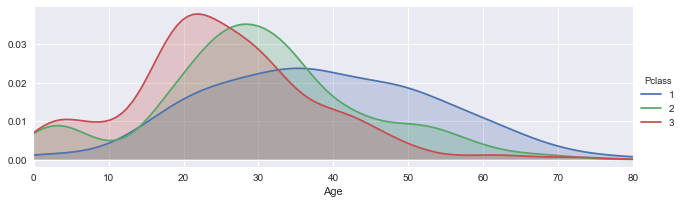

In [331]:
age_class_data = sns.FacetGrid(data_titanic, hue = 'Pclass', aspect = 3)
age_class_data.map(sns.kdeplot,'Age', shade=True)
age_class_data.set(xlim=(0,80))
age_class_data.add_legend()
plt.show()


From the above *Kernel Density Estimator (KDE)* plot, we see that **Pclass 1 (First class)** has the most evenly distributed shape for the whole range of age. This might be due to the fact that Pclass 1 had very less passengers as compared to the other two and so even a few outliers can change the shape of the whole graph. For the **Pclass 2 (Second class)**, we see that the majority of the distribution lies between **20 - 40 years** and for **Pclass 3 (Third class)**, the majority of the distribution lies between **15 - 35 years** with a small bulk at around **5 years (children)**. Pclass 3 had the most number of passengers, so even though maybe there were old people, it was not enough to evenly distribute the curve like Pclass 1. So it remains positively skewed.

## Gender distribution by class

Now let's see if there are any pattern between the gender and the socio economic conditions of the passengers. **First class** consisted of the weathiest and the **Third class** consisted of the poorest. In this scenario, was there any pattern among the genders?

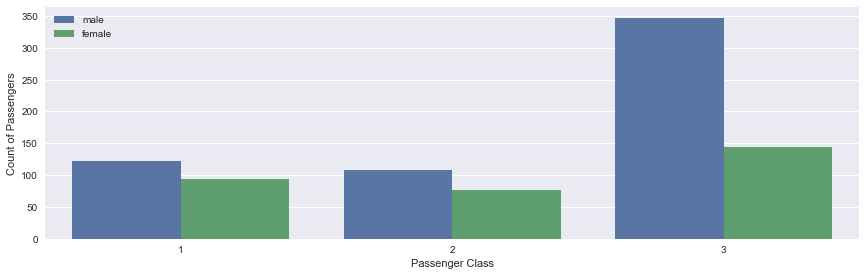

In [332]:
gender_class = sns.factorplot('Pclass', data = data_titanic, hue = 'Sex',kind = 'count', legend = False, aspect = 3)
plt.legend(loc = "upper left")
plt.xlabel('Passenger Class')
plt.ylabel('Count of Passengers')
plt.show()

So we see, in both first and the second class, the number of male population exceeded the female population but not by a huge amount. But in the third class, male population was much much higher than the female population. The female population is distributed much more evenly between all the 3 classes.

## Embarkment distribution by class

This might be a very interesting question. Can we tell by the distribution of the Passenger Class from the different Embarkment location the socio economic status of that place?

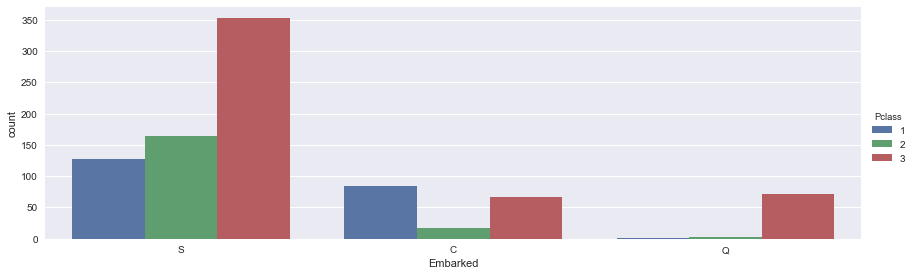

In [333]:
embarked_class = sns.factorplot('Embarked', data = data_titanic, hue = 'Pclass',kind = 'count', aspect = 3)
plt.show()

Looking at the above plot, we can see that the majority of the people boarded the Titanic from **Southampton** with the majority class being the **Third class**. In **Queenstown**, again the majority of the people were in **Third class**. But in **Cherbourg**, there was a close split between the **First class **and the **Third class** with **First class** leading. So maybe the socio economic condition of **Cherbourg** was much better than the other two places. 

## Subdividing the data into Male, Female and Child

We know that female and children were given higher priorities for rescual as compared to males. But from the current data, we don't have a group which states that if a particular passenger was a child or not. So based on the age, we will do that ourselves. For a base condition for this project , we will take **16** as a base age under which the passenger will be considered a child. So now, let us write a function which will take the age and the gender of the passenger. If the age is <= 15, the function will return 'child'. Else, it will return the gender of that particular passenger.

In [334]:
def childOrAdult(passenger):
    age, sex = passenger

    if age <= 15:
        return 'child'
    else:
        return sex


Now we will add a new column in the dataframe **'data_titanic'** called **'AdultChild'** which can have three possible values: **'Male', 'Female' and 'Child'**. We will apply the **childOrAdult** function on this column and get the new values.

In [335]:
data_titanic['AdultChild'] = data_titanic[['Age', 'Sex']].apply(childOrAdult, axis=1)
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AdultChild
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,male


So now that we have our new column, let's calculate a count for Male, Female and Child. Also we will make a *Kernel Density Plot* to get the distribution shape.

AdultChild
child      83
female    271
male      537
Name: PassengerId, dtype: int64


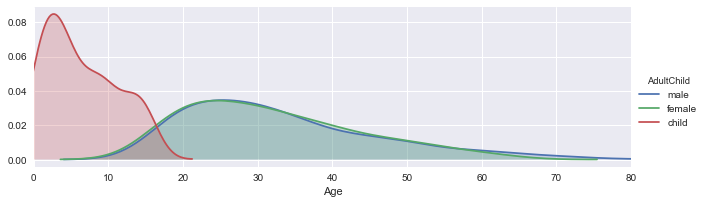

In [336]:
print(data_titanic.groupby('AdultChild')['PassengerId'].count())

child_male_female = sns.FacetGrid(data_titanic, hue='AdultChild', aspect=3)
child_male_female.map(sns.kdeplot,'Age', shade=True)
child_male_female.set(xlim=(0,80))
child_male_female.add_legend()

plt.show()

So we see from the *KDE plot* that the Adult male and female both are **uniformly equal** in the age range. For the children, the major bump is at around **2-3 year** range, i.e *newborns*. Also there is another slight bump at around age of **15**. So these two are the significant age range for the children.

## Child/Adult (Male, Female) Distribution by Passenger class

Now that we have subdivided the data and included children. Let's try to calculate the distribution of this field by the passenger class **(First, Second or Third)**

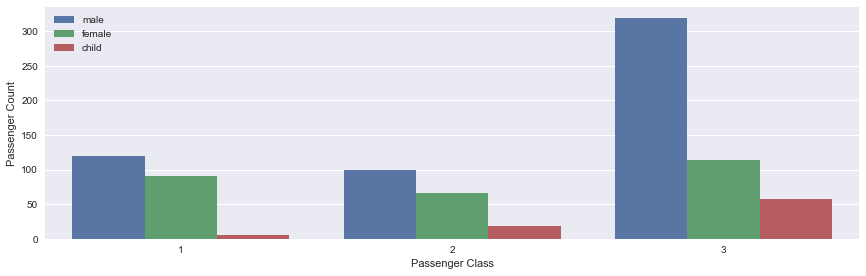

In [337]:
child_adult_class = sns.factorplot('Pclass',data = data_titanic, hue = 'AdultChild', kind = 'count', legend = False, aspect = 3)
plt.legend(loc = "upper left")
plt.xlabel("Passenger Class")
plt.ylabel("Passenger Count")
plt.show()

From the above plot, we can see that again the **Third class** has the *majority of the population* and the **Male passengers** are leading in all the three classes. We also see that the **Female passengers** are *evenly distributed* in all the three classes. The **Child** population is *more* in **Third class** than the **First Class** or **Second Class**.

## Subdividing the data into 'Alone' or 'Family'

Again we arrive at a situation where we will need a new derived column in the existing dataframe. This is because, from the data we see that some passengers were travelling alone and some were travelling with family. We can get this information from the **'SibSp' (Sibling or Spouse)** and **'Parch' (Parent or Children)** column. If the values for both these columns are added, we either get a **zero value** *(Travelling alone)* or a value **greater than zero** *(Travelling with Family)*. Based on this observations, we will make a new column in our dataframe and populate that column with either the value **'Alone'** or the value **'Family'**

We are doing this because later we will try to figure out if the survival rate is correlated with whether a person is travelling Alone or With family.

In [338]:
data_titanic['Alone_or_family'] = data_titanic.Parch + data_titanic.SibSp
data_titanic['Alone_or_family'].loc[data_titanic['Alone_or_family'] > 0] = 'Family'
data_titanic['Alone_or_family'].loc[data_titanic['Alone_or_family'] == 0] = 'Alone'
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AdultChild,Alone_or_family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,male,Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,female,Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,female,Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,male,Alone


So now we see our new column **'Alone_or_family'** got added to the dataframe which consists of the value we need. Now let's try to do some analysis on these values.


Let us see the overall distribution of the passengers travelling alone and passengers travelling with family.

Alone_or_family
Alone     537
Family    354
Name: PassengerId, dtype: int64


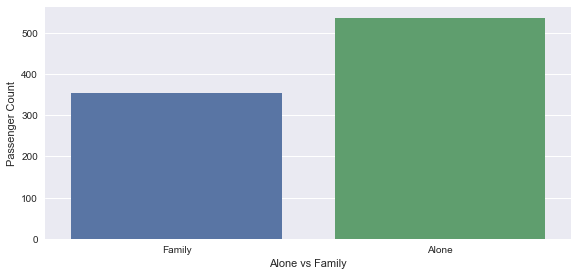

In [339]:
print(data_titanic.groupby('Alone_or_family')['PassengerId'].count())

alone_or_family = sns.factorplot('Alone_or_family', data = data_titanic, kind = 'count', aspect = 2)
plt.xlabel("Alone vs Family")
plt.ylabel('Passenger Count')
plt.show()

So we see that 537 passengers were travelling with family and 354 passengers were travelling alone.

# SURVIVAL RATE

Now that we have calculated few of the basic statistics and distributions, let's see how many of those factors either individually or grouped with others played any role towards a passenger's survival. First we will try to analyze individual factors and then we will try to combine various factors and try to find whether they are correlated to a passenger's survival.

## Basic Survival Distribution

Let us first try to see how is the average distribution of **Survived** vs **Not Survived**. **'Survived'** is marked by *1* and **'Not Survived'** is marked by *0*.

Survived
0    549
1    342
Name: PassengerId, dtype: int64


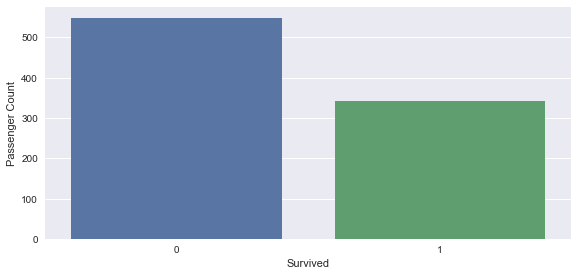

In [340]:
print(data_titanic.groupby('Survived')['PassengerId'].count())

survival_dist = sns.factorplot('Survived',data=data_titanic,kind = 'count', aspect = 2)
plt.ylabel("Passenger Count")
plt.show()

So we see **342** people out of **891** people survived and **549** people did not survive.

## Survival by age

Now we will analyze the **Survival Rate** based on the **Age Distribution**.We will plot **'Age'** on the x-axis and the **'Number of passengers'** in the y axis. We will stack our individual bars *Color coded* by **'Survived'** and **'Not Survived'** *(Green for Survived and Red for Not Survived)* which will give us the survival rate for different age groups.

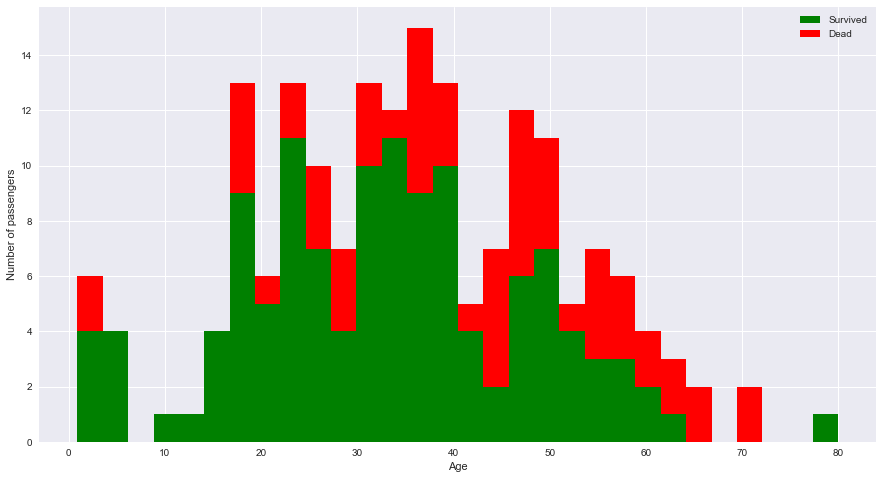

In [341]:
plt.figure(figsize=(15,8))
plt.hist([data_titanic.dropna()[data_titanic.dropna()['Survived']==1]['Age'], data_titanic.dropna()[data_titanic.dropna()['Survived']==0]['Age']], stacked=True,
         color = ['g','r'],bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

From the above plot, we see that for the age range **0 - 18**, the passengers are more **likely to survive** than older ones who are **more than 18 and less than 50**. The older passengers **> 50** seem to be rescued too

Let's also plot a **Regression Line** to see the *Correlation* between **Age** and **Survival**

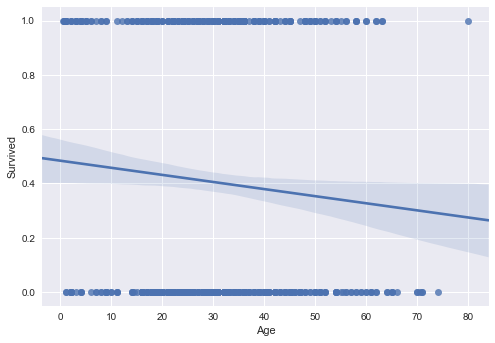

In [342]:
age_corr = sns.regplot('Age','Survived',data = data_titanic)
plt.show()

So we see that there is a *Negative Trend* in general between **Age** and **Survival Rate**. That is as Age becomes higher chances of survival lessens. But there are many outliers here. So we will dig deep and take into consideration other factors in a bit.

Also let's do the same plot with **'mendata'** and **'womendata'** to get some more statistics based on the gender.

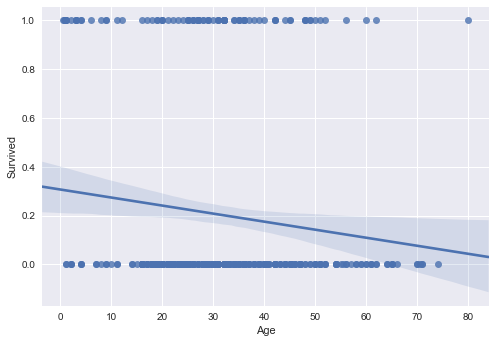

In [343]:
age_corr_men = sns.regplot('Age','Survived',data = mendata)
plt.show()

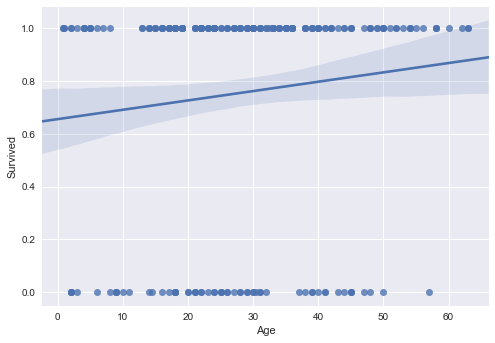

In [344]:
age_corr_women = sns.regplot('Age','Survived',data = womendata, label = 'Women')
plt.show()

So we see that for men, the Chances of Survival **decreased** as Age increased. But for women, Chances of survival **increased** as the age increased. Also the y intercept for female is much higher than that of male. We can support this trend by calculating all the datapoints for each passenger (Survival rate) and then taking mean of each. We will take 3 means. One for all, one for men and one for women.

In [345]:
print("Overall rate: " + str(age_corr.get_lines()[0].get_ydata().mean()))

print("Rate for men: " + str(age_corr_men.get_lines()[0].get_ydata().mean()))

print("Rate for women: " + str(age_corr_women.get_lines()[0].get_ydata().mean()))


Overall rate: 0.378702354765
Rate for men: 0.174047409387
Rate for women: 0.768832482896


So we can say for female, the chances are much higher than men for survival. We will delve deeper into this.

## Survival by Gender

We know that the Female passengers were given more priority over the Male passengers for rescual. Now let's try to analyze our data to see if the hypothesis that **'Male passengers are less likely to survive'** is true or not. We will try to plot **Survival rate** by the **Gender**.

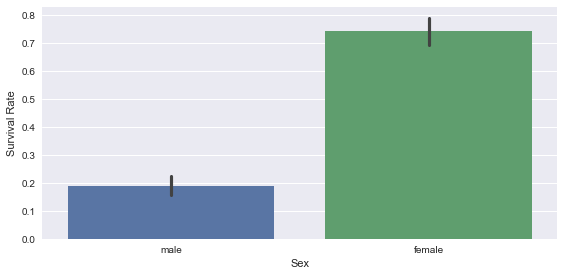

In [346]:
survival_by_gender = sns.factorplot('Sex','Survived',data=data_titanic,kind = 'bar', aspect = 2)
plt.ylabel("Survival Rate")
plt.show()

We see that the Female passengers were indeed much more likely to survive than the Male passengers. **(72% vs 19% approx)**

## Survival by Class

Previously we stated that some Passenger Classes were also given more priority for rescual than the other classes. Now let's try to see the distribution by the **Passenger Class** to see if there was indeed any relation.

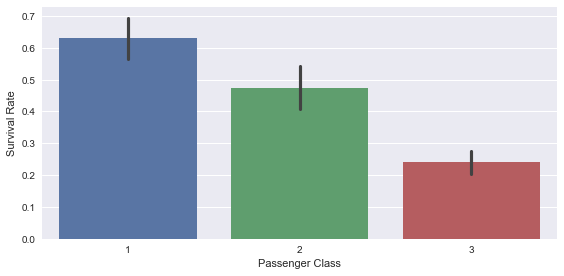

In [347]:
survival_by_class = sns.factorplot('Pclass','Survived',data = data_titanic, kind = 'bar', aspect = 2)
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.show()

So from the above plot, we indeed see that the **Ticket fare** played a vital role for survival. The fare for the First class was the **highest** and mostly consisted of *millionaires* and the fare for the Third class was the **lowest** and mainly consisted of *people from the lower rung of the society*. We see that the people who paid the most(**First Class**) had the maximum chances of survival **(~61%)** followed by the **Second Class(~47%)** and at last **Third class(~22%)**. We can also see this correlation from the factorplot plotted below based on points.

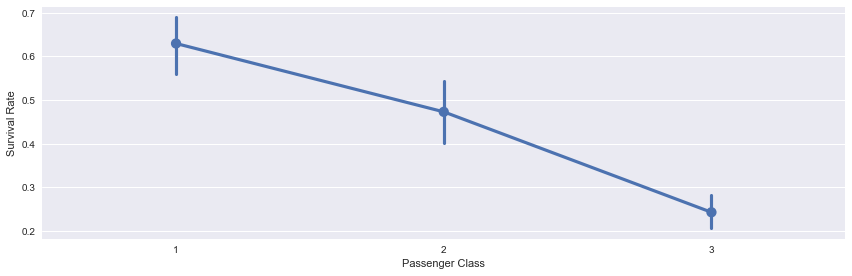

In [348]:
survival_by_class = sns.factorplot('Pclass','Survived',data = data_titanic, kind = 'point', aspect = 3)
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.show()

We see that there is a very *steep negative slope* for **Survival Rate** as we go from the **First Class** to the **Third Class**.

## Survival by Adult(Male/Female) or Child

We know that **Female** and **Children** were given more priority for rescual over the **Male** passengers. Now that we have subdivided our data into **'Male','Female'** and **'Child'**, let's see if the above hypothesis holds true.

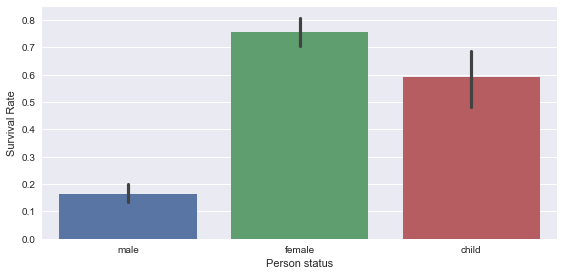

In [349]:
survival_by_age = sns.factorplot('AdultChild','Survived',data = data_titanic, kind = 'bar', aspect = 2)
plt.xlabel("Person status")
plt.ylabel("Survival Rate")
plt.show()

So it is indeed true that **Female** and **Children** had a much higher rate of survival **(~73% and ~60% respectively)** than the **Male** passengers who had a survival rate of only **~17%**

## Survival by Alone or Family

This might be something interesting to analyze. Was there any relation between the **Survival Rate** and the passenger travelling **Alone/With a family**. When with a family, our thoughts and actions are more collective. Let's see if there is any correlation. Also if there was any children with the family, often a family member was allowed to be with him/her in the rescue boats. So that might be a factor too.


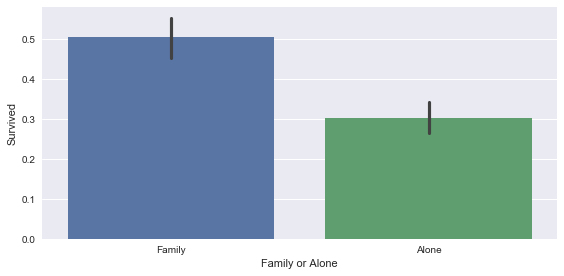

In [350]:
survival_by_family = sns.factorplot('Alone_or_family','Survived', data = data_titanic, kind = 'bar', aspect = 2)
plt.xlabel("Family or Alone")
plt.show()

We see that people travelling with family had a **50%** chance of survival and the people who were travelling alone had a **30%** chance of survival.

## Correlation between Age and Survival for different Sex

Previously we have seen the correlation between **Age** and **Survival**. Now let's see if the **Gender** of the person played any additional role. Let's plot the *Regression lines*.

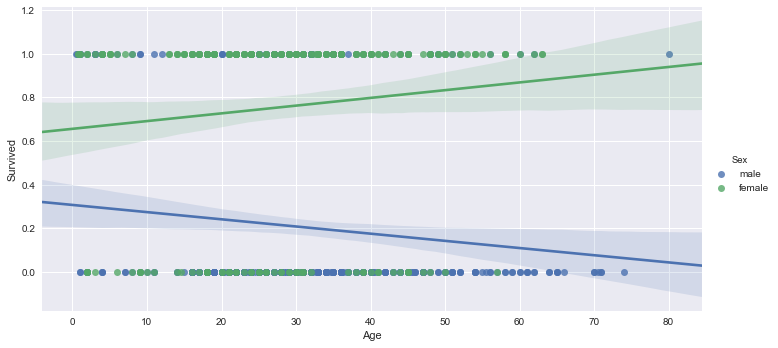

In [351]:
sns.lmplot('Age','Survived',data = data_titanic, hue = 'Sex', aspect = 2)
plt.show()

So we see that even though the overall Survival rate **decreased** with age, but for **Females**, it actually **increases** with age. The possible reason might be that **older women** were given greater priority for rescual.

## Correlation between Age and Survival rate for different Classes

We know that the First Class people were given more priority for rescual than 2nd or 3rd class. Also we know that Older Females had more chances of survival than Younger Females and older Men had less chances of survival than younger Men. Now let's see if together they make any trend we might care for.

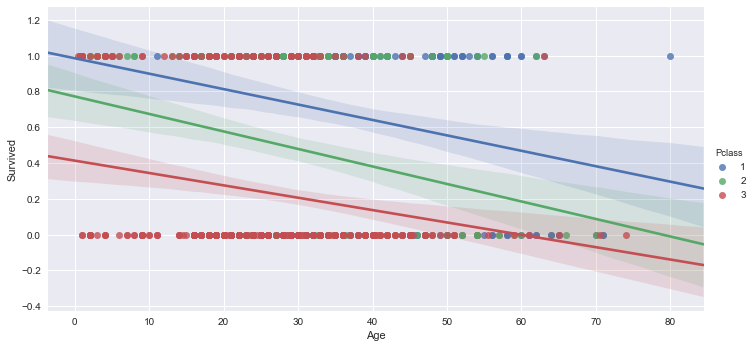

In [352]:
sns.lmplot('Age','Survived',data = data_titanic, hue = 'Pclass', aspect = 2)
plt.show()


So we see, that for all the classes, the general trend between age and survival rate is the same. All of them has a **negative slope** which indicates that chances of survival decreases with increase of age. Now let's use our **'mendata'** and **'womendata'** in the same plot to see if **'Gender'** played any role.

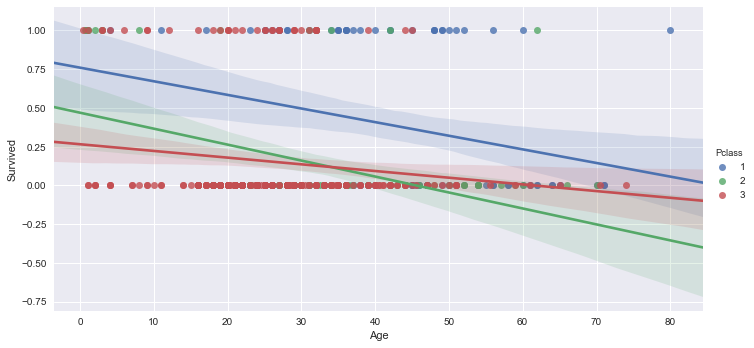

In [353]:
#For males
sns.lmplot('Age','Survived',data = mendata, hue = 'Pclass', aspect = 2)
plt.show()

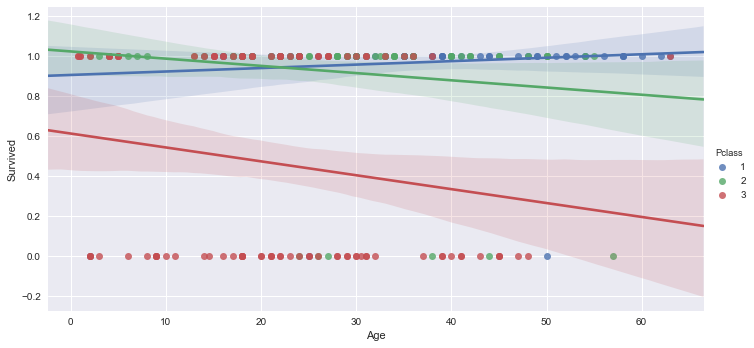

In [354]:
#For females

sns.lmplot('Age','Survived',data = womendata, hue = 'Pclass', aspect = 2)
plt.show()

### WOW! Now that is Interesting!

Let's take a minute to analyze the last few curves and our deductions. We deduced:

1.With increase in **age**, the **Survival Rate** decreased when there are *no other factors involved*.

2.With increase in **age**, the **Survival Rate** decreased for *Men*, but increased for *Women*.

3.For all the 3 classes, the **Survival Rate** decreased with increase in **Age** when there are no other factors involved.

### Now for the Interesting part

In our last two curves, we made these observations:

1.For **Males**, chances of survival **decreased** for all the three classes with increase in age, but the **slope of the First class and the Second Class** is much *steeper* than the **slope of third class**. That means the chances of survival with age decreased much faster in the First and the Second classes but much slower for people in the Third class. Does that mean, the well bought up older people in the first and second class had much less survival instinct than the older people in the Third class? May be, May be not! There is a **correlation** here, but that does not implies **causation**.

2.Even though we saw, that for females, the overall slope is **positve**, i.e. with increase of age, the survival rate increases, in our last curve we see something deeper. The **chances of survival only inceased for females who were in the first class**. But for the females in the second and third class, the **survival rate decreased with increasing age**. *But it's only the positive trend in the First class which made the overall curve's slope positive!* So that might be due to the fact that older women who were in the first class were given much more priority than older women in the second and third class.



## Correlation between passenger class and survival rate

Now we will plot the **Survival Rate** against the **Passenger Classes** and see if there is any trend

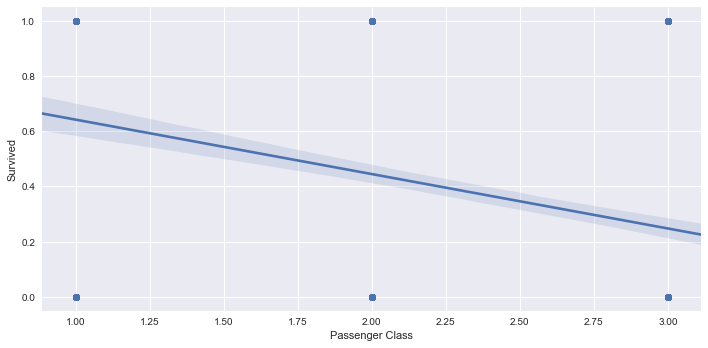

In [355]:
sns.lmplot('Pclass','Survived',data = data_titanic, aspect = 2)
plt.xlabel("Passenger Class")
plt.show()

Even though passenger classes are whole number, in the above figure we see the **negative trend** between Passenger class and survival rate. That means First class people had higher survival rate than 2nd class people and 2nd class people had higher survival rate than 3rd class people.

## Correlation between Passenger class and survival rate for Adult(Male/Female) or Children

Now that we have seen the general **decreasing trend** between Passenger class and survival rate, let's dig deeper and include the **Adult_Or_Child column** to see if there are any **additional trends** we might be missing.

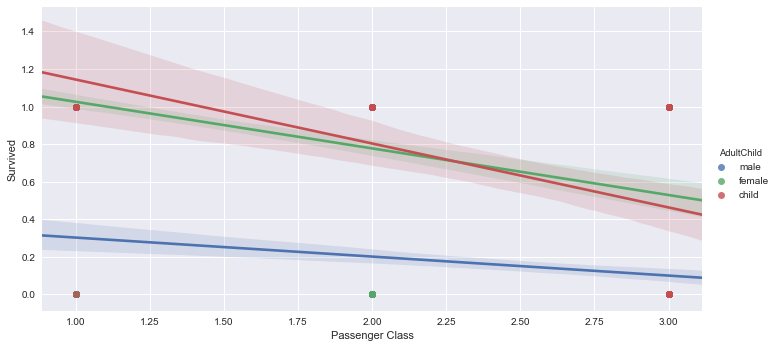

In [356]:
sns.lmplot('Pclass','Survived',data = data_titanic,hue = 'AdultChild', aspect =2 )
plt.xlabel("Passenger Class")
plt.show()

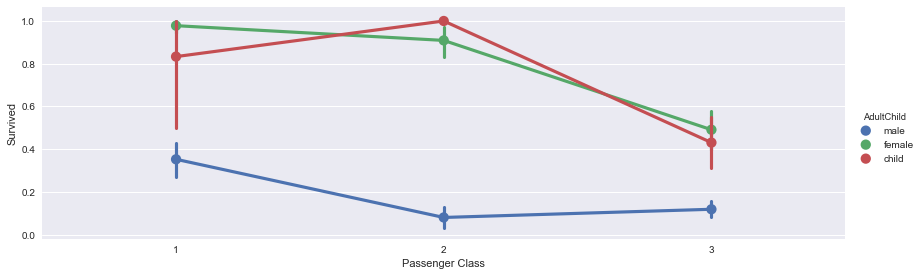

In [357]:
sns.factorplot("Pclass", "Survived", hue='AdultChild', data=data_titanic, kind='point', aspect = 3)
plt.xlabel("Passenger Class")
plt.show()

From the above two plots, we can see that the male population had a very **thin survival rate** overall. It decreased very steeply from first to second class. But somehow the **males from the third class had slightly higher survival rate than the males from the second class**. For Females, the overall survival rate was **much higher than males**. But it decreased from first to third class quite evenly. For children, we see that somehow the **children from the second class had a higher survival rate than the children from the first class**. This might be due to a number of factors, but unfortunately we don't have enough data to analyze the reason or theory behind it. Children from third class had a much less survival chance than children from first or second class.

## Correlation between Passenger Class and Survival Rate for different Sex

Now let's see if the **Gender** played any additional role in the **Survival Rate** for different **Passenger Classes**.

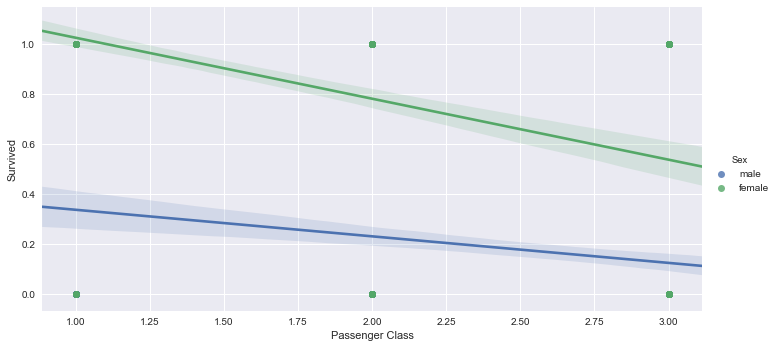

In [358]:
sns.lmplot('Pclass','Survived',data = data_titanic,hue = 'Sex', aspect = 2)
plt.xlabel("Passenger Class")
plt.show()

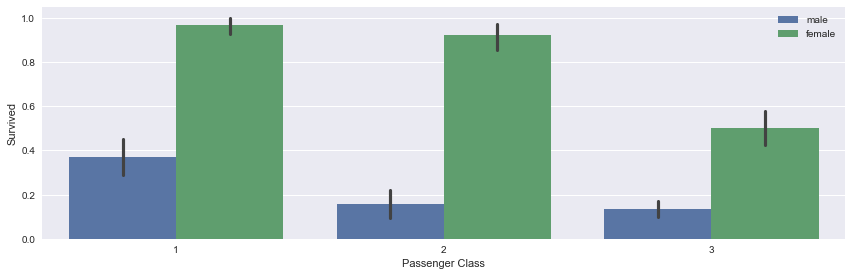

In [359]:
class_sex = sns.factorplot("Pclass", "Survived",order=[1,2,3],data=data_titanic,hue='Sex', kind='bar',legend = False, aspect = 3)
plt.legend(loc = 'upper right')
plt.xlabel("Passenger Class")
plt.show()

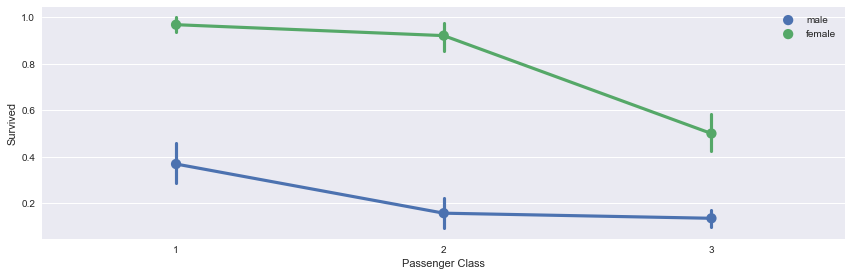

In [360]:
class_sex = sns.factorplot("Pclass", "Survived",order=[1,2,3],data=data_titanic,hue='Sex', kind='point', legend = False, aspect = 3)
plt.legend(loc = 'upper right')
plt.xlabel("Passenger Class")
plt.show()

From the above three plots, we can see, that for all the classes, **Females had much higher chances of survival than Males**.But for both of them, **chances of survival decreased as we moved from First class to Third class**.

## Correlation between passenger class and Survival Rate for Children

Although this would be a very unfortunate thing to analyze, but still let us see if the **socio economic status of the children** played any role in their **Survival Rate**. We will create a new DataFrame called **child_data** consisting of only the records where the value of the column **'AdultChild'** is **'Child'**.

In [361]:
#Creating new dataframe

child_data = data_titanic[data_titanic.AdultChild == 'child']
child_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AdultChild,Alone_or_family
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S,child,Family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,C,child,Family
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,G6,S,child,Family
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,7.8542,NaN,S,child,Alone
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,29.1250,NaN,Q,child,Family


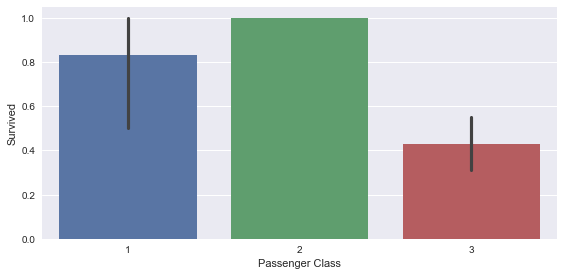

In [362]:
sns.factorplot('Pclass','Survived',data = child_data, kind = 'bar', aspect = 2)
plt.xlabel("Passenger Class")
plt.show()


So we see that there's indeed some *patterns* here. The **children from the Third class had the least chances of survival**. The **children from the Second class had the highest chance** followed closely by the **children from the First class**.

## Processing the names

We see that the **'Name'** column of the Titanic dataset has a **Title** in it **(Mr, Mrs etc)**. Now there are some more titles apart from the traditional ones like **'Lady', 'Major' etc**. So can we group these titles into some **Positions** and then see if the **positions played any factors in the Survival rate**? Let's try to do that! First let us define a function **get_possible_titles** to get all the possible title which is there. We see that the names follow this format : **'Lastname, Title. FirstName'**. So we will use a *lambda function* here. First we will split by the **','** and take the **[1] or the Second element**. Then we will split by the **'.'** and take the **[0] or the First element**.

In [363]:
def get_possible_titles():
    global data_titanic

    # we extract the title from each name
    data_titanic['Title'] = data_titanic['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())

    return data_titanic['Title'].unique()

get_possible_titles()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

We see that apart from conventional titles like Mr, Mrs, Miss, there are some other titles. Upon further research, we find that these titles can be **grouped** into a few groups namely: **Officer and Royal**. So we will create a **dictionary** with all these possible groups and map them into a *new column in the Dataframe*. We will call this new column **'Title'**. So let's create a function to do that **(get_titles)**

In [364]:
def get_titles():
    global data_titanic

    # we extract the title from each name
    data_titanic['Title'] = data_titanic['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())

    # Map of Aggregated titles
    Title_Dictionary = {
        "Capt": "Officer",
        "Col": "Officer",
        "Major": "Officer",
        "Jonkheer": "Royal",
        "Don": "Royal",
        "Sir": "Royal",
        "Dr": "Officer",
        "Rev": "Officer",
        "the Countess": "Royal",
        "Dona": "Royal",
        "Mme": "Mrs",
        "Mlle": "Miss",
        "Ms": "Mrs",
        "Mr": "Mr",
        "Mrs": "Mrs",
        "Miss": "Miss",
        "Master": "Master",
        "Lady": "Royal"

    }

    # we map each title
    data_titanic['Title'] = data_titanic.Title.map(Title_Dictionary)

get_titles()


print("Possible Titles: ")
print(data_titanic.Title.unique())
data_titanic.head()

Possible Titles: 
['Mr' 'Mrs' 'Miss' 'Master' 'Royal' 'Officer']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AdultChild,Alone_or_family,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,male,Family,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,female,Family,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,female,Alone,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,female,Family,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,male,Alone,Mr


## Correlation between Passenger Title and survival

Let's try to do some analysis on the newly acquired information we just got and see if there are any relations lying here between the **Titles** and the **Survival Rate**.

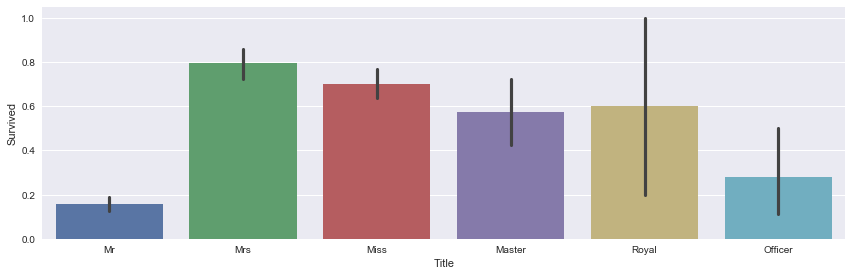

In [365]:
sns.factorplot('Title','Survived',data = data_titanic, kind = 'bar', aspect = 3)
plt.xlabel("Title")
plt.show()

**WOW! Now that is INTERESTING!** We see that there is indeed a relationship between the **Titles** and the **Survival rate**. As we predicted, the **male population(Mr)** had the **least chance of survival** and the **female population(Mrs, Miss)** had the **highest chances of survival** followed by the **children (Master)**. This plot confirms that. We see some additional information that the **'Royal'** people had also a greater chances of survival, even **higher than the children**. Also there are some pretty big numbers of **outliers** there on the positive side. So that means many of the Royal Family people survived. The ship **'Officers'** didn't have a good chance of survival. *(As from the movie, we saw, a great many of them sacrificed themselves! Maybe that is the case here too.)*. Let's do some more analysis. Let's add the Passenger class variable here and see if that played any additional role.

## Correlation between Passenger Title and Passenger class with Survival

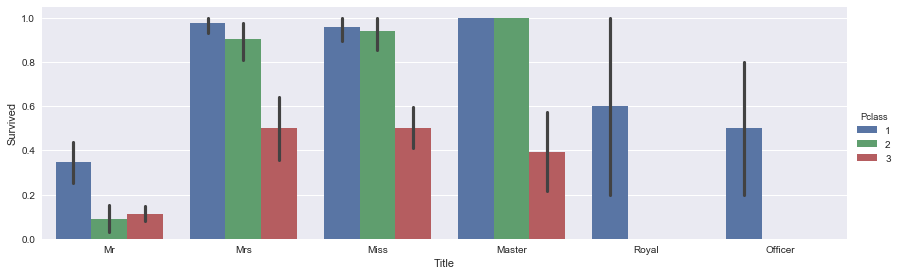

In [366]:
sns.factorplot('Title','Survived',data = data_titanic, hue = 'Pclass', kind = 'bar', aspect = 3)
plt.xlabel("Title")
plt.show()

We are not getting much additional info here as we see that both **'Royal'** and **'Officer'** group stayed in the **First class**. So no role of Passenger class for them. As for the rest we already knew the information. So now let's do another thing. Let's **create a new dataframe consisting of only 'Royal' and 'Officer' group** and try to subdivide them on their **Gender** and see the corresponding **Survival Rate**.

## Correlation between 'Royal', 'Officer' group and their Gender with Survival

In [367]:
data_royal = data_titanic[data_titanic.Title == 'Royal']
data_royal.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AdultChild,Alone_or_family,Title
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,27.7208,NaN,C,male,Alone,Royal
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,39.6000,A16,C,female,Family,Royal
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,56.9292,A20,C,male,Family,Royal
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,86.5000,B77,S,female,Alone,Royal
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,0.0000,NaN,S,male,Alone,Royal


In [368]:
data_officer = data_titanic[data_titanic.Title == 'Officer']
data_officer.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AdultChild,Alone_or_family,Title
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,13.000,NaN,S,male,Alone,Officer
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,12.525,NaN,S,male,Alone,Officer
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,90.000,C78,Q,male,Family,Officer
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,26.000,NaN,S,male,Family,Officer
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,14.000,NaN,S,male,Alone,Officer


In [369]:
data_royal_officer = data_royal.append(data_officer)
data_royal_officer.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AdultChild,Alone_or_family,Title
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,27.7208,NaN,C,male,Alone,Royal
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,39.6000,A16,C,female,Family,Royal
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,56.9292,A20,C,male,Family,Royal
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,86.5000,B77,S,female,Alone,Royal
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,0.0000,NaN,S,male,Alone,Royal


Sex
female     3
male      20
Name: PassengerId, dtype: int64


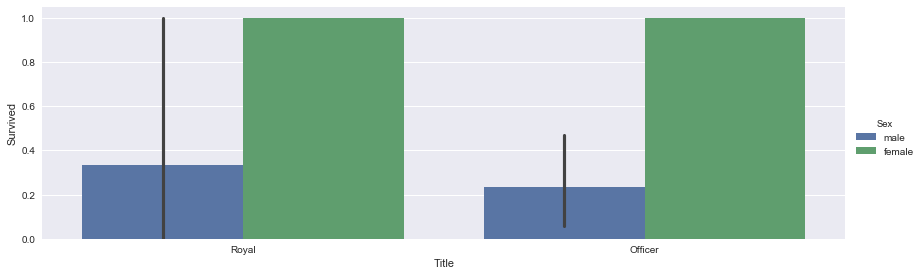

In [370]:
print(data_royal_officer.groupby('Sex')['PassengerId'].count())

sns.factorplot('Title','Survived',data = data_royal_officer, hue = 'Sex', kind = 'bar', aspect = 3)
plt.xlabel("Title")
plt.show()

So we see that the combined dataframe for **Royal families** and **Officers of the Titanic** consisted of **20 Males** and **3 Females**. In both groups, the **chances of survival for the Female population is 100%** but for the male population it **drastically goes down to ~35% for Royal Families and ~22% for the Officers of Titanic**.

## Distribution of Age by Survival

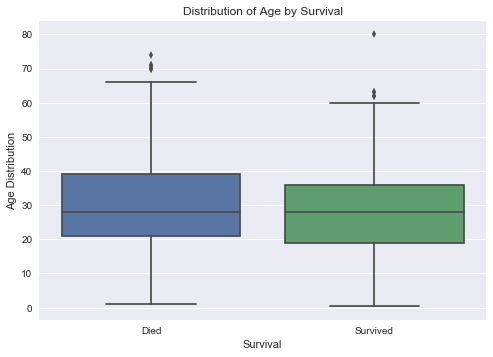

In [371]:
age_dist = sns.boxplot(data=data_titanic, x='Survived', y='Age')
age_dist.set(title='Distribution of Age by Survival', xlabel = 'Survival', ylabel = 'Age Distribution', xticklabels = ['Died', 'Survived'])
plt.show()

We see that the median age of both the **'Died'** and **'Survived'** group are almost same. The **IQR** is also almost the same in both but it is a **little higher** in the **'Died'** group increasing towards the **older people**.

## Distribution of Age by Gender and Survival

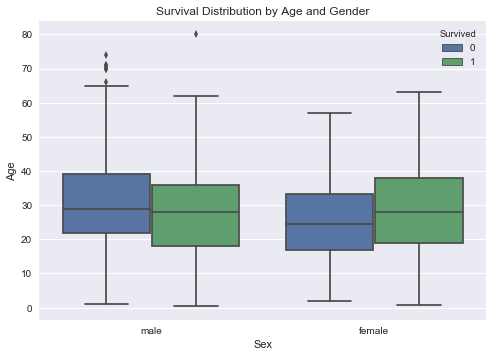

In [372]:
age_gender_dist = sns.boxplot(data=data_titanic.dropna(subset = ['Age']), x= 'Sex', y = 'Age', hue='Survived')
age_gender_dist.set(title='Survival Distribution by Age and Gender')
plt.show()

From the above box plot we see, that in the Male group, the **older Male population showed higher trend towards 'Non-Survival' than the younger Male population**. For the Female group, it is opposite. **The younger Female group showed lower trends towards 'Non-Survival' than the older Female population**.

## Distribution of Age by Class and Survival

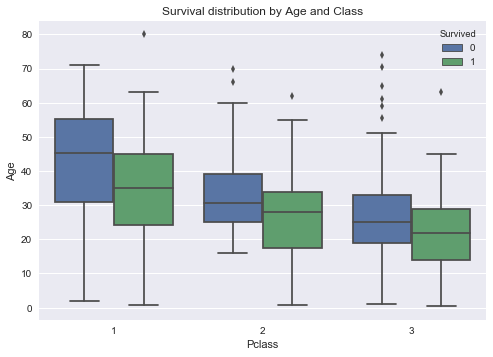

In [373]:
age_class_dist = sns.boxplot(data = data_titanic.dropna(subset = ['Age']).sort_values('Pclass'), x='Pclass', y='Age', hue='Survived')
age_class_dist.set(title='Survival distribution by Age and Class', xlabel='Pclass')
plt.show()

Looking at the box plots of different **Passenger Class**, we see that when we group by **class(First, Second or Third)** , the **younger crowd** had a higher survival rate based on the **IQR**.

## Conclusion:

In the given **Titanic** Dataset, we divided it into different groups like *Gender, Age, Embarkment Location, Passenger Classes etc* and calculated different statistics on these groupsbased on the **Survival Rate**. We also arrived at a few derived columns in our dataframe like *Title, AdultChild, Alone_or_Family* to get more information on whether the **Survival Rate** depended on whether the person was travelling alone or with family, whether the passenger was a child or not or if his/her Title mattered in his/her Survival.

For these parameters, we calculated basic statistics and also investigated Survival Statistics along with change in one of the factors or a combination of them.

## Effect of Factors on the Survival Rate:

**1. Age:**Now we see the general trend that Children and Older people were given more priority on rescual. But it's not that linear. We saw that the class in which a Passenger belonged also played an integral part in his/her survival. We saw that when we considered Age and Sex, Survival Rate increased with increase in Age for Females but it decreased for Males. When we delved deeper, we saw that only for the females in the First Class, Survival Rate increased with Age, but for the other two classes, it decreased with Age. The outliers can actually affect the overall shape of the curves here. In the Age vs Survival stacked Histogram, we saw that younger people and older people actually had a higher survival rate than middle aged people which confirms to the protocol maintained. In the box plot **'Distribution of Age by Survival'**, we saw that the **Died** group's IQR pertains to older people while the **Survived** group's IQR pertains to younger people. So except the two extreme ends, we see that younger people had a better chance of Survival.

Looking at **'Distribution of Age by Class and Survival'** Box Plot we can see uniformly in all Passenger Classes the non-survivors had a higher IQR and mean (older age) than the survivors showing a correlation that supports the general graph **(Distribution of Age by Survival)** and the hypothesis that older passengers tended to be more likely to be in the non-suvivor group versus younger passengers that tended to be in the survior group.

**2. Gender:** Gender played another vital role in the Survival Rate of the passenger. We see from general trends that Females and Children were given more priority towards the lifeboats than the Males. When we look at the Box Plot **'Distribution of Age by Gender and Survival'**, we see that for the Male group, most of the **Not Survived** group IQR favoured the group of older people while most of the **Survived** group's IQR pertained to the Younger crowd. But when we see the same data for the Female crowd, wee observe something interesting. We see that for the Female population, older age actually favoured the Survival Rate than Younger age. So maybe here, the older females were given more attention than younger females.

When we see the overall proababilty of survival based on the Gender, we saw that Female population had a much higher chances of Survival**(74%)** than that of the Male population **(19%)**.

When we digged deeper and bought the **'Passenger Class'** as the third variable, we see that here also the same observation persists. In all the Passenger classes, Females had a higher Survival Rate than the Male.

**3. Children:** We saw from our analysis, that being a children helped in an increase of the Survival Rate. In almost every 'Passenger Class', we see that the children have a higher proababilty of survival.

**4. Travelling Alone vs With Family: **There can be many reasons for the variablity of Survival Rate on whether a person is travelling alone or with family. When with family, we often help each other in making decisions and do things in an arranged way. But being alone, while can have it's benefits, sometimes also can bring a helplessness within a person as he/she doesn't have anyone to look up to and give his/her best to survive. Also maybe sometimes we don't want to leave our loved ones and hence our inner survival instinct risens. Whatever be the reason, from our analysis, we saw, that in the present situation, travelling with family increased the Survival Rate to 50% while travelling alone made the Survival Rate at 30%.

**5. Title of the Passenger: **We included a new column in our dataframe called **Title** in which we extracted the passenger titles from his/her name and classified them into these groups: **'Mr' 'Mrs' 'Miss' 'Master' 'Royal' 'Officer'**. When we analyzed the Survival Rate based on these titles, we saw that the titles **'Mrs', 'Miss', 'Master' and 'Royal'** has much higher Survival Rate than **'Mr'** and **'Officer'**. So this confirms that children and the women had a much higher survival rate. We also get this new information that people from the **'Royal'** family had a great Survival Rate too (even higher than the Children). We then made a new dataframe consisting of only the people with titles **'Royal'** or **'Officer'** and we analyzed the Survival Rate of this dataframe based on Gender. We saw, that in these two groups combined, the Female population had a **100% Survival Rate** while for the Male population in the **Royal** and **Officer** group had a very little Survival Rate of **38% and 22%** respectively.  

## Embarkment Location and Socio-Economic Conditions:

The Titanic before making its final voyage, embarked on Three different cities: 


**1. QueensTown(Q)**

**2. Cherbourg(C)**

**3. Southampton(S)**

We saw that the majority of the passengers embarked from Southampton. The distribution between the different passenger classes was as follows in Southampton:

**A) First Class**: Around 100

**B) Second Class**: Around 150 

**C) Third Class**: Around 350

From the data, we see that it is possible that Southampton was the largest city among the three with a vast population. The majority was working class people along with few High borns. From Queenstown, we see almost everyone that boarded Titanic was in the Third Class. So it might be that Queenstown was a small city with a poor socio-economic condition. Finally we see that from Cherbourg the predominant classes were First class and Third Class. This might be due to Cherbourg only consisted of High Born and working people.

One thing we must keep in mind that these were small samples from the entire population of the three cities. So it would be wrong to make any assumptions about these three cities. But it seems Cherbourg was a small Economically stable town, Queenstown was a small town with poor socio economic conditions and Southampton was the largest town with the highest population consisting of people of all ranges based on their socio-economic conditions.









## Limitations on the Analysis of the Titanic Dataset

While we made many analysis' on this dataset and correlated many variables and tried to calculate the Survival Rate based on these variables, one important thing we must keep in mind is that we are limited by this data which does not provide us with full visibility. 

First of all, this data has many NULL values in it. So many of our calculations will be partially correct or incomplete as we didn't have the full data. Maybe the rest of the data points would have changed our correlations entirely, but we have no way of knowing that.

Secondly, we are assuming that this data is perfect when we are calulating the Survival Rate based on different factors. But the most probable case would be that maybe Survival Rate was not limited to these factors only. Maybe there were many other factors which played in a passenger's survival. For example, even though we see that People in Third class had much less chance of survival, maybe when the ship hit the iceberg, some of the passengers from the third class were nearest the boats and managed to escape. We also don't know how many boats were there, where were they kept? Which class were they nearest too? When the boats disembarked, were the properly filled or did the remain half empty. What was the time duration after which the rescue ship came? Where were the passengers at the moment when the ship hit the icebergs?  We also saw that Passenger Class 3 had much less survival rate for women and children also. Why is that? Doesn't that violate the protocol 'Children and Women first'? So does it mean that somebody was not playing by the rules? Maybe passengers in the first class bribed the staff to get on the boats? We can't say for sure. Were the lifeboats uniformly distributed around the ship? So we see that there are so many factors at play here, that we cannot safely conclude or correlate something without bias.

Thirdly, in this project we did not perform many staistical testing. What we did was statistical calculations, trend and correlation observations. With statistical testing for a particular hypothesis, we can have a much better and statistically significant relationship between two or more variables where we know the confidence interval of the acceptance or rejection of the null hypothesis. But as we didn't do that, our correlations remain biased.

## References:

1. https://en.wikipedia.org/wiki/RMS_Titanic
2. https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic
3. https://www.encyclopedia-titanica.org/